# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

# Step 0. Read in Data and NLTK Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_csv('walmart_product_reviews_dataset.csv')
print(df.shape)

(20639, 13)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20639 entries, 0 to 20638
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   crawled_at         20639 non-null  object 
 1   verified           20639 non-null  bool   
 2   reviewed_at        20639 non-null  object 
 3   reviewed_by        20626 non-null  object 
 4   helpful_count      20639 non-null  int64  
 5   not_helpful_count  20639 non-null  int64  
 6   content            16208 non-null  object 
 7   raw_content        20639 non-null  object 
 8   average_rating     19609 non-null  float64
 9   review_heading     14020 non-null  object 
 10  product_url        20639 non-null  object 
 11  review_page_url    20639 non-null  object 
 12  rating             20639 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 1.9+ MB


In [4]:
df.head()

,crawled_at,verified,reviewed_at,reviewed_by,helpful_count,not_helpful_count,content,raw_content,average_rating,review_heading,product_url,review_page_url,rating
0,"07/02/2021, 01:56:13",False,"November 3, 2019",Greenmachine,0,0,"Great buy, always go with white dark colors me...","<div class=""review-text""><p>Great buy, always ...",NaN,High quality good prices$Bachelor pad,https://www.walmart.com/ip/142064014,https://www.walmart.com/reviews/product/142064014,5.0
1,"07/02/2021, 01:56:17",False,"June 4, 2020",Donna,2,0,Awesome product...love it,"<div class=""review-text""><p>Awesome product......",3.6,NaN,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,5.0
2,"07/02/2021, 01:56:17",True,"May 15, 2021",sherita,0,0,"Love it, easy to put up as well!!!!","<div class=""review-text""><p>Love it, easy to p...",3.6,NaN,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,5.0
3,"07/02/2021, 01:56:17",True,"April 30, 2021",LaLaLady2,0,0,These go up very easily and I love the cordles...,"<div class=""review-text""><p>These go up very e...",3.6,Great blinds at a great price.,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,5.0
4,"07/02/2021, 01:56:17",True,"May 11, 2021",Hope,0,0,"When using the rod to open the blind, the rod ...","<div class=""review-text""><p>When using the rod...",3.6,My mini blind,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,4.0


In [5]:
df['rating'] = df['rating'].astype('int64')

In [6]:
df.insert(0, 'Id', range(1, 1 + len(df)))

In [7]:
df = df.dropna(subset=['content'])
df = df.dropna(subset=['review_heading'])
df = df.dropna(subset=['average_rating'])

## Quick EDA

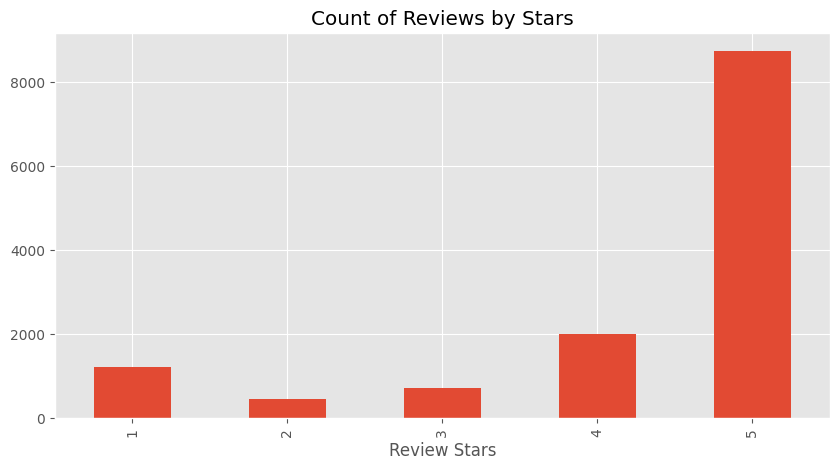

In [8]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [9]:
example = df['content'][100]
print(example)

bought this for my son, we got him a new mattress a few months ago and found that all his previous bed sheets no longer fit because his new mattress was alot thicker. got this because it said deep pockets, I'm happy to say this sheet is still on his bed, and hes a flip flopper at night. he loves the color as do I! I plan on getting him more in the future.


In [10]:
nltk.download('punkt')
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['bought', 'this', 'for', 'my', 'son', ',', 'we', 'got', 'him', 'a']

In [11]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[:10]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('bought', 'VBD'),
 ('this', 'DT'),
 ('for', 'IN'),
 ('my', 'PRP$'),
 ('son', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('got', 'VBD'),
 ('him', 'PRP'),
 ('a', 'DT')]

In [12]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  bought/VBD
  this/DT
  for/IN
  my/PRP$
  son/NN
  ,/,
  we/PRP
  got/VBD
  him/PRP
  a/DT
  new/JJ
  mattress/NN
  a/DT
  few/JJ
  months/NNS
  ago/RB
  and/CC
  found/VBD
  that/IN
  all/PDT
  his/PRP$
  previous/JJ
  bed/NN
  sheets/VBZ
  no/DT
  longer/JJR
  fit/NN
  because/IN
  his/PRP$
  new/JJ
  mattress/NN
  was/VBD
  alot/JJ
  thicker/NN
  ./.
  got/VBD
  this/DT
  because/IN
  it/PRP
  said/VBD
  deep/JJ
  pockets/NNS
  ,/,
  I/PRP
  'm/VBP
  happy/JJ
  to/TO
  say/VB
  this/DT
  sheet/NN
  is/VBZ
  still/RB
  on/IN
  his/PRP$
  bed/NN
  ,/,
  and/CC
  hes/VBZ
  a/DT
  flip/JJ
  flopper/NN
  at/IN
  night/NN
  ./.
  he/PRP
  loves/VBZ
  the/DT
  color/NN
  as/IN
  do/NN
  I/PRP
  !/.
  I/PRP
  plan/VBP
  on/IN
  getting/VBG
  him/PRP
  more/RBR
  in/IN
  the/DT
  future/NN
  ./.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [16]:
sia.polarity_scores(example)

{'neg': 0.028, 'neu': 0.842, 'pos': 0.13, 'compound': 0.8398}

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['content']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/13133 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,crawled_at,verified,reviewed_at,reviewed_by,helpful_count,not_helpful_count,content,raw_content,average_rating,review_heading,product_url,review_page_url,rating
0,4,0.000,0.503,0.497,0.8969,"07/02/2021, 01:56:17",True,"April 30, 2021",LaLaLady2,0,0,These go up very easily and I love the cordles...,"<div class=""review-text""><p>These go up very e...",3.6,Great blinds at a great price.,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,5
1,5,0.120,0.821,0.059,-0.1779,"07/02/2021, 01:56:17",True,"May 11, 2021",Hope,0,0,"When using the rod to open the blind, the rod ...","<div class=""review-text""><p>When using the rod...",3.6,My mini blind,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,4
2,6,0.223,0.647,0.129,-0.3182,"07/02/2021, 01:56:17",True,"December 24, 2020",Karen,0,0,one of the top brackets was broken. how do I ...,"<div class=""review-text""><p>one of the top bra...",3.6,bracket arrived broken,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,4
3,7,0.145,0.474,0.380,0.8373,"07/02/2021, 01:56:17",False,"August 5, 2019",Jas,1,0,I love the sting free pushing and pulling to a...,"<div class=""review-text""><p>I love the sting f...",3.6,Hands free blinds,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,4
4,8,0.143,0.857,0.000,-0.7927,"07/02/2021, 01:56:17",True,"May 5, 2021",Snow,0,0,Very agitating to order a 25 x 72 inch blind (...,"<div class=""review-text""><p>Very agitating to ...",3.6,Shade smaller than measurements on outside of ...,https://www.walmart.com/ip/203858277,https://www.walmart.com/reviews/product/203858277,3


## Plot VADER results

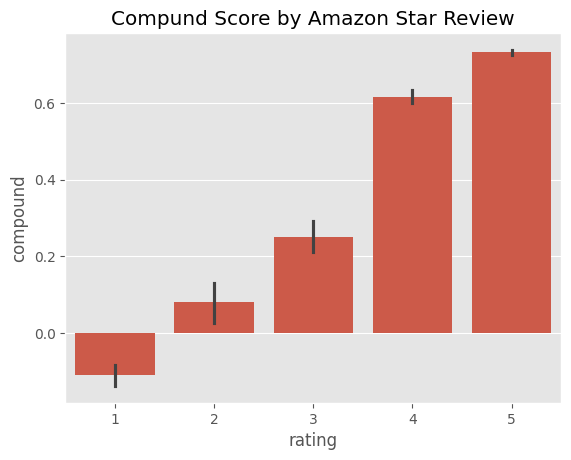

In [20]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

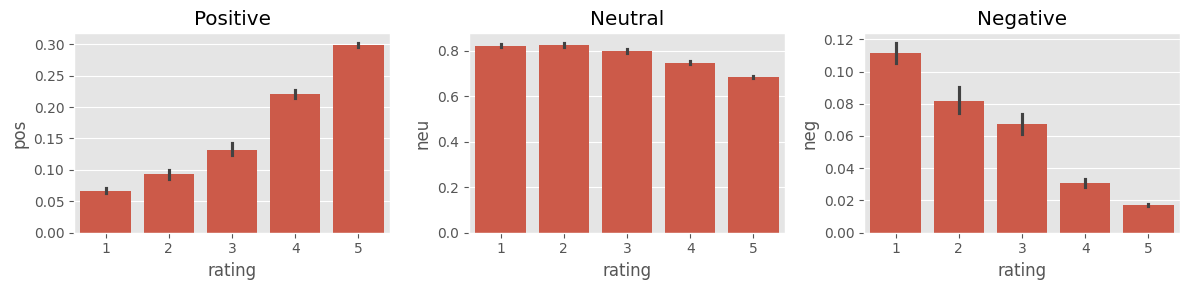

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [24]:
# VADER results on example
print(example)
sia.polarity_scores(example)

bought this for my son, we got him a new mattress a few months ago and found that all his previous bed sheets no longer fit because his new mattress was alot thicker. got this because it said deep pockets, I'm happy to say this sheet is still on his bed, and hes a flip flopper at night. he loves the color as do I! I plan on getting him more in the future.


{'neg': 0.028, 'neu': 0.842, 'pos': 0.13, 'compound': 0.8398}

In [46]:
# Run for Roberta Model
encoded_text = tokenizer("this product is bad", return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97909045, 'roberta_neu': 0.018118177, 'roberta_pos': 0.0027914427}


In [26]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [27]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['content']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/13133 [00:00<?, ?it/s]

Broke for id 9177
Broke for id 10204
Broke for id 10219
Broke for id 10326
Broke for id 10487
Broke for id 11236
Broke for id 11240
Broke for id 12549
Broke for id 13825
Broke for id 14591
Broke for id 17922
Broke for id 17925
Broke for id 17927
Broke for id 17943
Broke for id 18035
Broke for id 19438
Broke for id 19455


In [28]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Compare Scores between models

In [29]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'crawled_at', 'verified',
       'reviewed_at', 'reviewed_by', 'helpful_count', 'not_helpful_count',
       'content', 'raw_content', 'average_rating', 'review_heading',
       'product_url', 'review_page_url', 'rating'],
      dtype='object')

# Step 3. Combine and compare

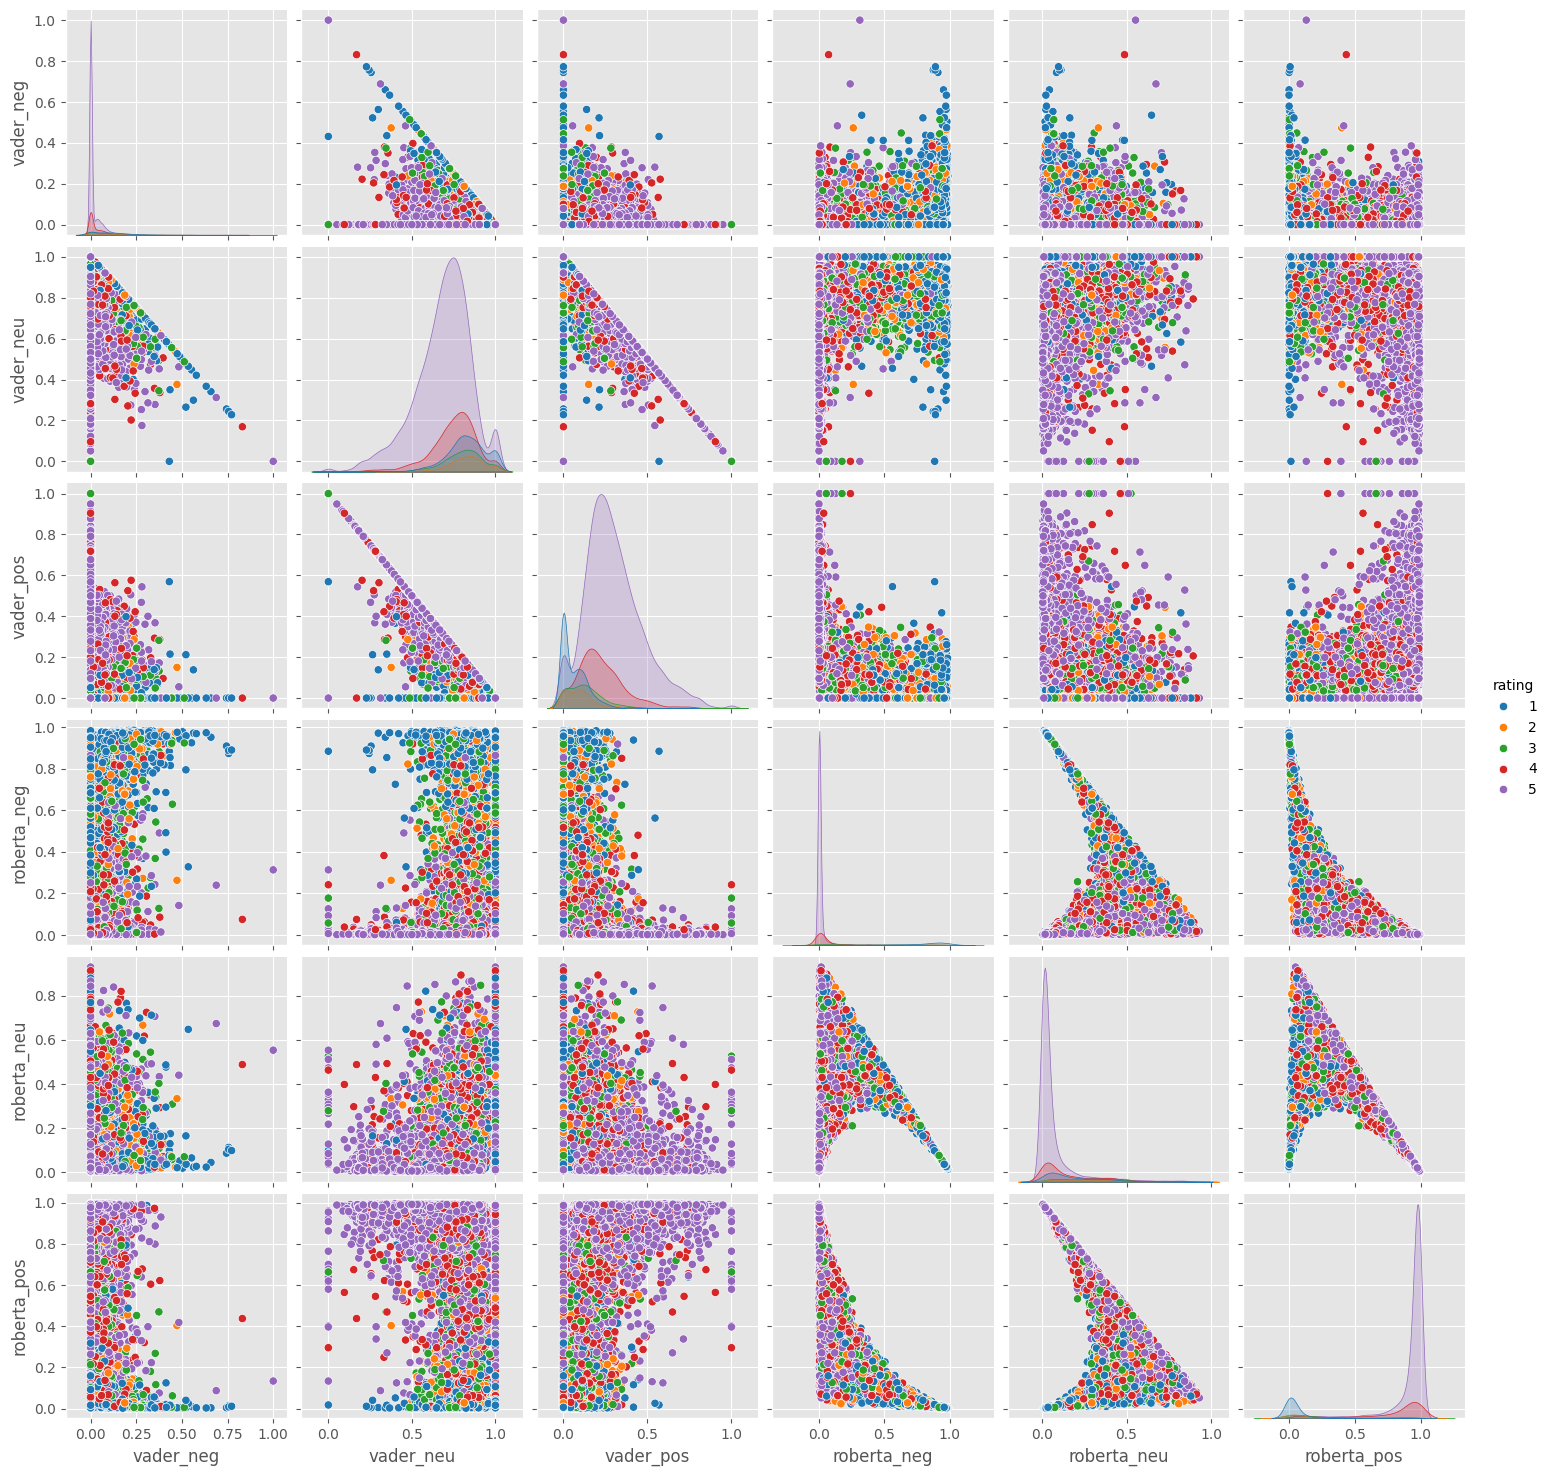

In [30]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [31]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['content'].values[0]

'I love the rug. It is much nicer than I thought. It is thick and soft. Really brightens up my room.'

In [32]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['content'].values[0]

'Know good'

In [33]:
# nevative sentiment 5-Star view

In [34]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['content'].values[0]

'KNOCK OFFS DO NOT WORK AS WELL. I KNOW THATS WHY I ORDERED THESE FROM HOOVER'

In [36]:
results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['content'].values[0]

'no complaints'

# Extra: The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [37]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [38]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [39]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]

In [40]:
sent_pipeline('booo')

[{'label': 'NEGATIVE', 'score': 0.9936267137527466}]

# The End